# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file = "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [4]:
from collections import Counter

In [5]:
counter_y_train = Counter(y_train)
counter_y_valid = Counter(y_valid)
counter_y_test = Counter(y_test)

counter_y = counter_y_train + counter_y_valid + counter_y_test

In [6]:
y_train_freq = list(map(lambda x: x[1], sorted(dict(counter_y_train).items(), 
                                               key=lambda x: x[0])))
y_valid_freq = list(map(lambda x: x[1], sorted(dict(counter_y_valid).items(), 
                                               key=lambda x: x[0])))
y_test_freq = list(map(lambda x: x[1], sorted(dict(counter_y_test).items(), 
                                              key=lambda x: x[0])))

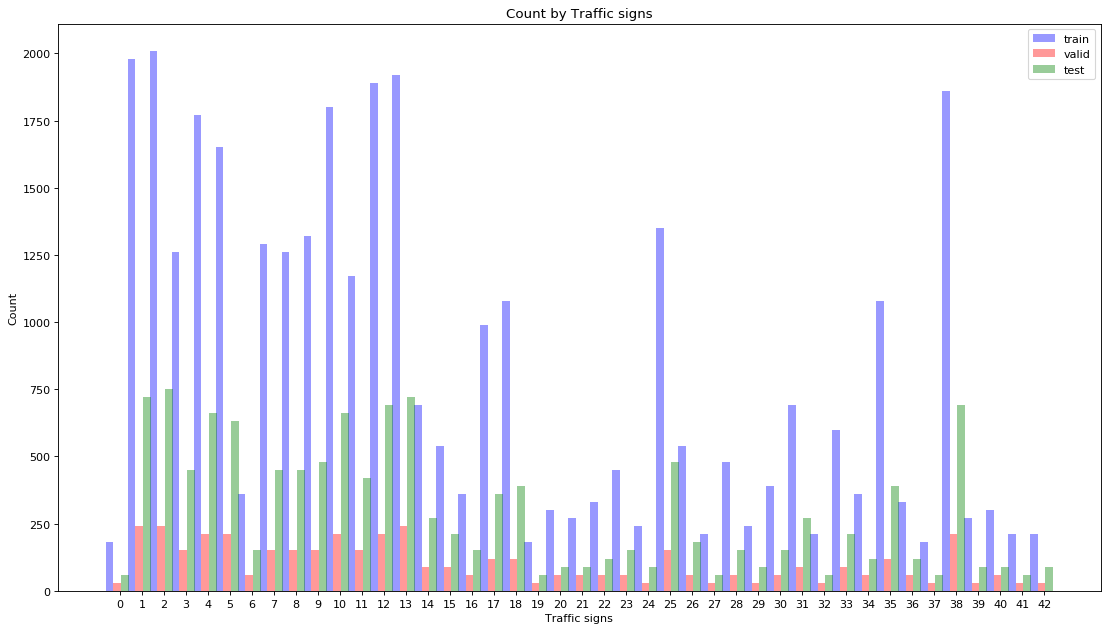

In [7]:
import numpy as np
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
# fig, ax = plt.subplots()

index = np.arange(n_classes)
bar_width = 0.35

opacity = 0.4

rects_train = plt.bar(index, y_train_freq, bar_width,
                 alpha=opacity,
                 color='b',
                 label='train')

rects_valid = plt.bar(index + bar_width, y_valid_freq, bar_width,
                 alpha=opacity,
                 color='r',
                 label='valid')

rect_test = plt.bar(index + bar_width + bar_width, y_test_freq, bar_width,
                 alpha=opacity,
                 color='g',
                 label='test')


plt.xlabel('Traffic signs')
plt.ylabel('Count')
plt.title('Count by Traffic signs')
plt.xticks(index + bar_width + bar_width / 3, sorted(dict(Counter(y_train)).keys()))
plt.legend()

plt.tight_layout()
plt.show()

From the graph above, it can be seen that there's a very uneven distribution of classes acrosss different sets of data. This is detrimental towards the learning. Simple quick-fixes like upscaling and downscaling could be applied to mitigate this. Data augmentation can also be put into place, instead of upscaling and downscaling.

In [8]:
for key in counter_y_train.keys():
    counter_y_train[key] /= (0.01 * counter_y[key])
    counter_y_test[key] /= (0.01 * counter_y[key])
    counter_y_valid[key] /= (0.01 * counter_y[key])

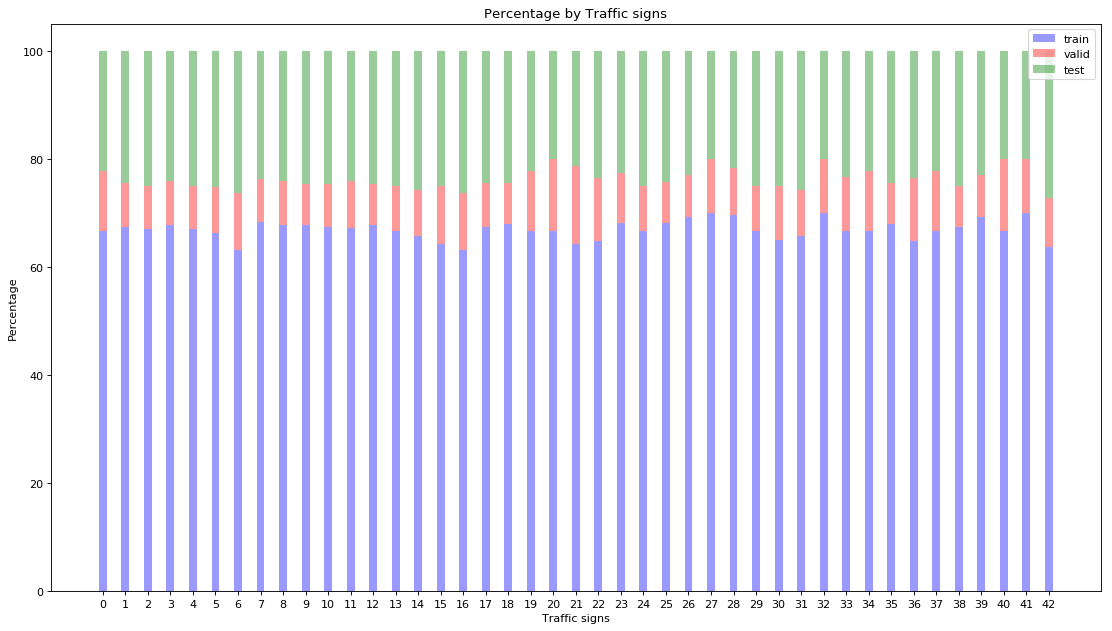

In [9]:
y_train_freq = list(map(lambda x: x[1], sorted(dict(counter_y_train).items(), 
                                               key=lambda x: x[0])))
y_valid_freq = list(map(lambda x: x[1], sorted(dict(counter_y_valid).items(), 
                                               key=lambda x: x[0])))
y_test_freq = list(map(lambda x: x[1], sorted(dict(counter_y_test).items(), 
                                              key=lambda x: x[0])))
                  
fig=plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
# fig, ax = plt.subplots()

index = np.arange(n_classes)
bar_width = 0.35

opacity = 0.4

rects_train = plt.bar(index, y_train_freq, bar_width,
                 alpha=opacity,
                 color='b',
                 label='train')

rects_valid = plt.bar(index, y_valid_freq, bar_width,
                 alpha=opacity,
                 color='r',
                 label='valid',
                 bottom=y_train_freq)

rect_test = plt.bar(index, y_test_freq, bar_width,
                 alpha=opacity,
                 color='g',
                 label='test',
                 bottom=np.array(y_valid_freq) + np.array(y_train_freq))


plt.xlabel('Traffic signs')
plt.ylabel('Percentage')
plt.title('Percentage by Traffic signs')
plt.xticks(index, sorted(dict(Counter(y_train)).keys()))
plt.legend()

plt.tight_layout()
plt.show()

From the graph above we can see that, the composition of different classes across different sets of data, i.e.: train, valid and test. This is telling us that the validation and test accuracies reflect the quality of learning done by the model. 

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [10]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2

import numpy as np
%matplotlib inline
import matplotlib.image as mpimg

In [11]:
def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img,ang_range,shear_range,trans_range,brightness=0):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.

    A Random uniform distribution is used to generate different parameters for transformation

    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    # Brightness


    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))

#     if brightness == 1:
#         img = augment_brightness_camera_images(img)

    return img

In [12]:
num_variation = 2
additional_train_images = [None] * (num_variation * n_train)

idx = 0
for x_train, y in zip(X_train, y_train):
    for var_idx in range(num_variation):
        additional_train_images[idx] = (transform_image(x_train,20,10,5,brightness=1), y)
        idx += 1

In [13]:
def draw_image(img, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgplot = ax.imshow(cv_rgb)

Sample of actual training image


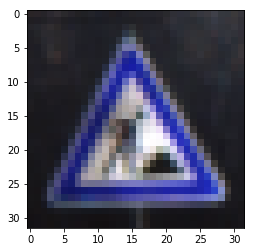

In [14]:
idx = 33498
print("Sample of actual training image")
draw_image(X_train[idx])

Sample of augmented images


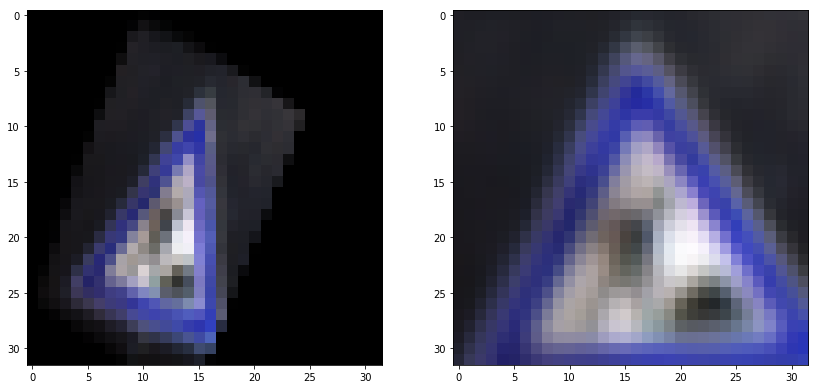

In [15]:
print("Sample of augmented images")
f, axarr = plt.subplots(1, num_variation, figsize=(14, 8))
for num_var in range(num_variation):
    draw_image(additional_train_images[((idx-1) * num_variation) + num_var][0], axarr[num_var])

In [16]:
X_train = np.concatenate((X_train, np.array(list(map(lambda x: x[0], 
                                                     additional_train_images)))))
y_train = np.concatenate((y_train, np.array(list(map(lambda x: x[1], 
                                                     additional_train_images)))))

new_n_train = len(X_train)


In [17]:
def rgb_2_gray(image):
    return cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)[:, :, np.newaxis]

In [18]:
def transform_rgb_2_gray(data):
    n_data = len(data)
    new_data = [None] * n_data
    
    for idx in range(n_data):
        new_data[idx] = rgb_2_gray(data[idx])
        
    return np.array(new_data)

In [19]:
X_train_gray = transform_rgb_2_gray(X_train)
X_valid_gray = transform_rgb_2_gray(X_valid)
X_test_gray = transform_rgb_2_gray(X_test)
    
image_shape = X_train_gray[0].shape

In [20]:
print("Number of training examples =", new_n_train)
print("Image data shape =", image_shape)

Number of training examples = 104397
Image data shape = (32, 32, 1)


In [21]:
def draw_gray_image(img, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    imgplot = ax.imshow(img, cmap='gray')

Sample of augmented images


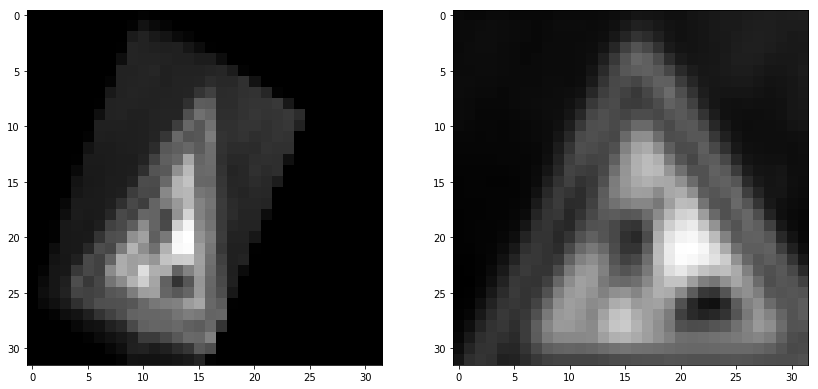

In [22]:
print("Sample of augmented images")
f, axarr = plt.subplots(1, num_variation, figsize=(14, 8))
for num_var in range(num_variation):
    draw_gray_image(X_train_gray[n_train + ((idx-1) * num_variation) + num_var][:,:,0], 
                    axarr[num_var])

In [23]:
### Preprocess the data here. It is required to normalize the data. 
### Other preprocessing steps could include converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def transform_max_min_norm(data):
    n_data = len(data)
    new_data = [None] * n_data
    
    for idx in range(n_data):
        normalizedImg = np.zeros(data[idx].shape)
        new_data[idx] = cv2.normalize(data[idx],  normalizedImg, 0, 255, cv2.NORM_MINMAX)\
        [:, :, np.newaxis]
        
    return np.array(new_data) 

X_train_gray_norm = transform_max_min_norm(X_train_gray)
X_valid_gray_norm = transform_max_min_norm(X_valid_gray)
X_test_gray_norm = transform_max_min_norm(X_test_gray)

# X_train_gray = (X_train_gray.astype('float32') - 128)/128
# X_valid_gray = (X_valid_gray.astype('float32') - 128)/128
# X_test_gray = (X_test_gray.astype('float32') - 128)/128

***ANSWER*** ( *Preprocessing* ): The preprocessing was done according to the recommended quick approximation. I have tried with `(X - 128)/256` and `X - np.mean(X_train)` for train, valid and test but they didn't yield better results. The goal of normalization is to avoid extreme weights dominating the distribution of gradient across weights during training. Extreme weights will result in extreme gradients and hence the learning process will be slower.

In [24]:
import tensorflow as tf
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

get_available_gpus()

['/device:GPU:0', '/device:GPU:1']

Sample of normalized images


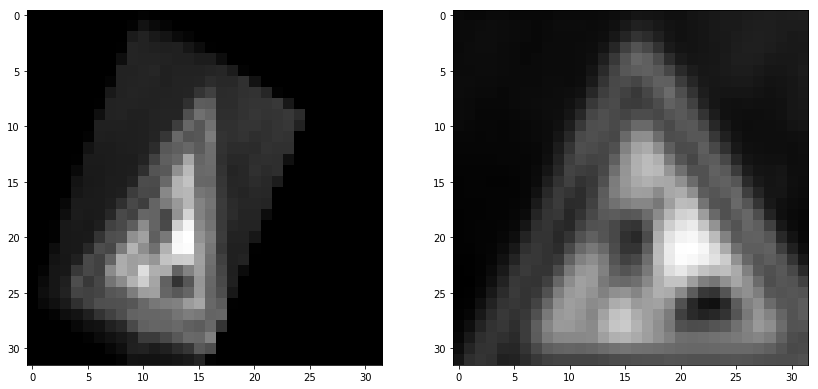

In [25]:
print("Sample of normalized images")
f, axarr = plt.subplots(1, num_variation, figsize=(14, 8))
for num_var in range(num_variation):
    draw_gray_image(X_train_gray[n_train + ((idx-1) * num_variation) + num_var][:,:,0], 
                    axarr[num_var])

### Model Architecture

***ANSWER*** ( *Model Architecture* ): The architecture took inspiration from Deep Learning Nanodegree Program. From the CNN lecture, it's learned that as we have more layers, the features learned will be more generalized. For an example, in the context of NLP, CNN would probably learn to identify alphabets at earlier layers, then words and finally sentences. Putting this into CNN's context, for earlier layers the number of filters are less but the resultant feature maps (filter's output) have a bigger dimensions as there could be many occurences of edges or lines but the range of detection are limited (edges, straight lines, etc; we do not need 2 filters to detect the same thing), the subsequent layers would then learn the combination and spatial arrangement of these edges and such. Only the first Convolutional Layer has 5 X 5 kernel size meanwhile the rest has 3 X 3. This is because the image size themselves are very small to begin with, and I did not want to lose too much information too fast through the aggregating nature of Convolutional and Pooling Layers. Every Convolutional layer was followed by Pooling layer to aggregate local information. According to https://arxiv.org/pdf/1312.4400.pdf Global Average Pooling (GAP) reduces overfitting that the dense layer is proned to and facilitates the passing of loses from objective layer to feature maps. Essentially it replaces the final dense layers as seen in many other CNNs, reducing complexity, cost and overfitting meanwhile improving interpretability. Finally there's a Fully Connected Layers to allow final adjustment of values. For those reasons I think this network configuration would work well.

In [26]:
from tensorflow.contrib.layers import flatten

def conv_pool_layer(x, mu=0, sigma=0.1, conv_ip_num_filters=None, conv_op_num_filters=None, 
                    conv_ksize_x=3, conv_ksize_y=3, 
                    pool_ksize_x=3, pool_ksize_y=3):
    
    conv_W = tf.Variable(tf.truncated_normal(
            shape=(conv_ksize_x, conv_ksize_y, conv_ip_num_filters, conv_op_num_filters), 
            mean = mu, stddev = sigma))
    conv_b = tf.Variable(tf.zeros(conv_op_num_filters))
    conv   = tf.nn.conv2d(x, conv_W, strides=[1, 1, 1, 1], padding='VALID') + conv_b
    conv = tf.nn.relu(conv)
    conv = tf.nn.max_pool(conv, ksize=[1, pool_ksize_x, pool_ksize_y, 1], 
                          strides=[1, 1, 1, 1], padding='VALID')
        
    return conv
    


def LeNet(x):
    with tf.device('/gpu:0'):
        # Arguments used for tf.truncated_normal, randomly defines variables for the weights 
        #and biases for each layer
        mu = 0
        sigma = 0.1
        n_channels = 1
        
        
        # 1st Convolutional and Max-Pooling layers
        conv1 = conv_pool_layer(x, mu=mu, sigma=sigma,
                                conv_ip_num_filters=n_channels,
                                conv_op_num_filters=8,
                                conv_ksize_x=3,
                                conv_ksize_y=3,
                                pool_ksize_x=3,
                                pool_ksize_y=3)
        
        # 2nd Convolutional and Max-Pooling layers
        conv2 = conv_pool_layer(conv1, mu=mu, sigma=sigma,
                                conv_ip_num_filters=8,
                                conv_op_num_filters=16,
                                conv_ksize_x=3,
                                conv_ksize_y=3,
                                pool_ksize_x=3,
                                pool_ksize_y=3)
        
        # 3rd Convolutional and Max-Pooling layers
        conv3 = conv_pool_layer(conv2, mu=mu, sigma=sigma,
                                conv_ip_num_filters=16,
                                conv_op_num_filters=32,
                                conv_ksize_x=3,
                                conv_ksize_y=3,
                                pool_ksize_x=3,
                                pool_ksize_y=3)

        # 4th Convolutional and Max-Pooling layers
        conv4 = conv_pool_layer(conv3, mu=mu, sigma=sigma,
                                conv_ip_num_filters=32,
                                conv_op_num_filters=64,
                                conv_ksize_x=3,
                                conv_ksize_y=3,
                                pool_ksize_x=3,
                                pool_ksize_y=3)
        
        # 5th Convolutional and Max-Pooling layers
        conv5 = conv_pool_layer(conv4, mu=mu, sigma=sigma,
                                conv_ip_num_filters=64,
                                conv_op_num_filters=128,
                                conv_ksize_x=3,
                                conv_ksize_y=3,
                                pool_ksize_x=3,
                                pool_ksize_y=3)
        
        # 6th Convolutional and Max-Pooling layers
        conv6 = conv_pool_layer(conv5, mu=mu, sigma=sigma,
                        conv_ip_num_filters=128,
                        conv_op_num_filters=256,
                        conv_ksize_x=3,
                        conv_ksize_y=3,
                        pool_ksize_x=3,
                        pool_ksize_y=3)
        
        # 1st Global Average Pooling
        gap1 = tf.nn.avg_pool(conv6, ksize=[1, 8, 8, 1], 
                       strides=[1, 1, 1, 1], \
                       padding='VALID')
        
        # 1st Fully connected layers
        fc0   = flatten(gap1)

        fc1_op_num = n_classes
        fc1_W = tf.Variable(tf.truncated_normal(shape=(256, fc1_op_num), mean = mu, 
                                                stddev = sigma))
        fc1_b = tf.Variable(tf.zeros(fc1_op_num))
        fc1   = tf.matmul(fc0, fc1_W) + fc1_b
        
        logits = fc1
        
        return logits

In [27]:
x = tf.placeholder(tf.float32, (None,) + image_shape) # reshape
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [28]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [29]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [30]:
from sklearn.utils import shuffle

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

***ANSWER*** ( *Model Training* ): The model was trained in mini batches. Size of the batch affects how fast the model learn to generalize. Batch size of 100 was used and the results has shown that it has enabled to model to learn enough within the first 20 epochs. The epoch was set to 100 even though the validation accuracy has plateaud at around epoch 65. AdamOptimizer was used because of its adaptive nature of the learning rate to moment of gradient which allows the model to learn to settle at a more precise global minima of error.

In [31]:
EPOCHS = 40
BATCH_SIZE = 200

In [32]:
X_train = X_train_gray_norm
X_valid = X_valid_gray_norm
X_test = X_test_gray_norm

In [33]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

max_validation_accuracy = 0
val_training_accuracy = None

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
        if max_validation_accuracy < validation_accuracy:
            max_validation_accuracy = validation_accuracy
            val_training_accuracy = training_accuracy
            saver.save(sess, './lenet')
            print("Better model saved")
        
        print()

    

Training...

EPOCH 1 ...
Training Accuracy = 0.741
Validation Accuracy = 0.862
Better model saved

EPOCH 2 ...
Training Accuracy = 0.860
Validation Accuracy = 0.927
Better model saved

EPOCH 3 ...
Training Accuracy = 0.894
Validation Accuracy = 0.940
Better model saved

EPOCH 4 ...
Training Accuracy = 0.913
Validation Accuracy = 0.952
Better model saved

EPOCH 5 ...
Training Accuracy = 0.928
Validation Accuracy = 0.945

EPOCH 6 ...
Training Accuracy = 0.944
Validation Accuracy = 0.960
Better model saved

EPOCH 7 ...
Training Accuracy = 0.946
Validation Accuracy = 0.962
Better model saved

EPOCH 8 ...
Training Accuracy = 0.957
Validation Accuracy = 0.967
Better model saved

EPOCH 9 ...
Training Accuracy = 0.955
Validation Accuracy = 0.960

EPOCH 10 ...
Training Accuracy = 0.960
Validation Accuracy = 0.958

EPOCH 11 ...
Training Accuracy = 0.962
Validation Accuracy = 0.959

EPOCH 12 ...
Training Accuracy = 0.972
Validation Accuracy = 0.968
Better model saved

EPOCH 13 ...
Training Accura

In [35]:
print("Training = {:.3f}".format(val_training_accuracy))
print("Best Validation = {:.3f}".format(max_validation_accuracy))

Training = 0.987
Best Validation = 0.987


***ANSWER*** ( *Solution Approach* ): The best validation set accuracy is 0.990. I have taken the model yielding this accuracy as the solution model. This is not the best approach as this could mean the model chosen was overfited. The more stabler validation accuracy would be somewhere around 0.98 which value are more frequently seen, indicating more generalized. However, I didn't want to over-engineer the model selection since the chosen model is showing decent Test Accuracy of 0.958 as shown below. 

In [36]:
with tf.Session() as sess:
#     tf.train.load_checkpoint('./lenet')
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.962


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [37]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import cv2
import matplotlib.pyplot as plt                        
%matplotlib inline      

### Predict the Sign Type for Each Image

In [38]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

from tensorflow import keras
image = keras.preprocessing.image                 
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(32, 32))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [39]:
from sklearn.datasets import load_files       
import numpy as np

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    target_names_dict = dict(enumerate(data['target_names']))
    
    targets = list(map(lambda target: target_names_dict[target], data['target']))
    files, targets = zip(*sorted(zip(files, targets)))
    return {'files': list(files), 'labels': list(targets)}

In [40]:
path = 'test-images'

In [41]:
my_test_set = load_dataset(path)

In [42]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True   

In [43]:
my_test_data = transform_max_min_norm(transform_rgb_2_gray(paths_to_tensor(
    my_test_set['files'])))

100%|██████████| 14/14 [00:00<00:00, 68.18it/s]


In [44]:
#run the graph
with tf.Session() as sess:
    saver.restore(sess, './lenet')
#     sess.run(tf.global_variables_initializer())
    my_predictions = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), 
                              feed_dict={x: my_test_data})

INFO:tensorflow:Restoring parameters from ./lenet


In [45]:
my_predictions

TopKV2(values=array([[1.0000000e+00, 4.9302482e-17, 4.4080806e-17, 6.0084882e-18,
        1.8831832e-18],
       [9.9999487e-01, 1.1653664e-06, 1.0045809e-06, 7.1067103e-07,
        5.8955089e-07],
       [9.9993277e-01, 6.7200199e-05, 5.8023075e-09, 2.9280459e-10,
        4.0121188e-12],
       [9.6060610e-01, 3.9393861e-02, 1.0644796e-14, 9.8209288e-16,
        1.8361316e-19],
       [1.0000000e+00, 4.9661765e-29, 7.0839548e-30, 0.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 2.2579543e-18, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 1.6606891e-15, 2.5242018e-25, 2.4939813e-28,
        1.4051093e-29],
       [9.9155772e-01, 6.3848742e-03, 2.0573698e-03, 8.8307550e-10,
        1.1653421e-12],
       [6.5574688e-01, 3.4425312e-01, 4.1773996e-15, 5.7295849e-19,
        1.0070002e-20],
       [1.0000000e+00, 1.8569302e-12, 8.6131888e-13, 5.7295659e-15,
        7.6942236e-23],
       [1.0000000e+00, 5.2271904e-14, 5.0213628e-14, 1.5075945e-14

### Analyze Performance

In [46]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, 
###it's 20% accurate on these new images.

import pandas as pd
signnames = pd.read_csv('signnames.csv', delimiter=',', header=0)

In [47]:
signnames_dict = dict(zip(list(signnames['ClassId']), list(signnames['SignName'])))

In [48]:
signnames_dict

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

In [133]:
def evaluate_image(img_path, idx_truth, top_n_preds):
    print("Actual sign: " + signnames_dict[idx_truth])
    print("Top %s predicted signs:" % str(len(top_n_preds)))
    print("------------------------------")

    for rank in range(len(top_n_preds)):
        print("| %s | %s |" % (str(top_n_preds[rank][1]), signnames_dict[top_n_preds[rank][0]]))
        
    img = cv2.imread(img_path)
    draw_image(img, ax=None)
    
    return (idx_truth == top_n_preds[0][0], top_n_preds[0][0])

***ANSWER*** ( *Acquiring New Images - Conclusion* ): The accuracy is 3/7, 43%. The test accuracy is bad probably due to the very different nature of the data. The test data I have gathered below are from `Wikipedia - German Road Signs`. These images are clean, artificial image, meanwhile the training set is a collection of road signs captured in realife. The difference could be lighting, angles and background which are contributing to the discrepancy of accuracy. 

For image 1 & 2, 'Beware of ice snow' was detected in respective top 5 predictions. The frame of symbol, i.e.: rectangle, triangle, red and such have played a major part of identifying signs. That's not a very good feature considering many of the signs share the same frame.

Meanwhile for image 3 & 4, 'Double curve' was only detected for 1 side. However the CNN managed to predict image 3 correctly with the highest confidence whereas The correct label wasn't even in the top 5 predictions for image 4.

Image 5, 'Slippery road' was predicted properly.

Image 6 and 7, 'Turn left ahead' was predicted incorrectly meanwhile 'Turn right ahead' was predicted correctly.

Actual sign: Priority road
Top 5 predicted signs:
------------------------------
| 1.0 | Priority road |
| 4.9302482e-17 | Right-of-way at the next intersection |
| 4.4080806e-17 | Yield |
| 6.008488e-18 | Roundabout mandatory |
| 1.8831832e-18 | No entry |


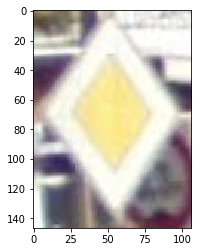

In [134]:
test_result = {}
idx = 0
test_result[idx] = evaluate_image(my_test_set['files'][idx], int(my_test_set['labels'][idx]),
                                  list(zip(my_predictions.indices[idx], my_predictions.values[idx])))

***ANSWER*** ( *Acquiring New Images - 1* ): This road sign has been predicted incorrectly however the correct solution is in top 5 predictions.

Actual sign: No entry
Top 5 predicted signs:
------------------------------
| 0.9999949 | No entry |
| 1.1653664e-06 | Yield |
| 1.0045809e-06 | Priority road |
| 7.1067103e-07 | No passing |
| 5.895509e-07 | Keep right |


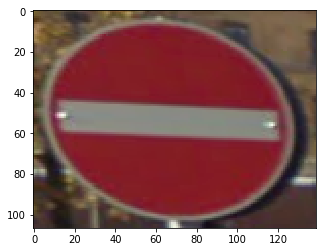

In [135]:
idx = 1
test_result[idx] = evaluate_image(my_test_set['files'][idx], int(my_test_set['labels'][idx]),
                                  list(zip(my_predictions.indices[idx], my_predictions.values[idx])))

Actual sign: Speed limit (50km/h)
Top 5 predicted signs:
------------------------------
| 0.99993277 | Speed limit (50km/h) |
| 6.72002e-05 | Turn right ahead |
| 5.8023075e-09 | Double curve |
| 2.928046e-10 | Keep right |
| 4.0121188e-12 | Speed limit (100km/h) |


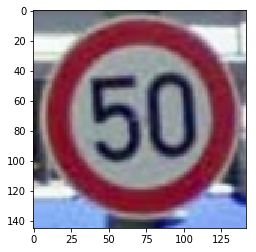

In [136]:
idx = 2
test_result[idx] = evaluate_image(my_test_set['files'][idx], int(my_test_set['labels'][idx]),
                                  list(zip(my_predictions.indices[idx], my_predictions.values[idx])))

Actual sign: Double curve
Top 5 predicted signs:
------------------------------
| 0.9606061 | Double curve |
| 0.03939386 | General caution |
| 1.0644796e-14 | Right-of-way at the next intersection |
| 9.820929e-16 | Road work |
| 1.8361316e-19 | Pedestrians |


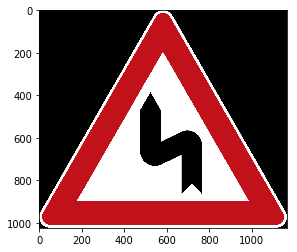

In [137]:
idx = 3
test_result[idx] = evaluate_image(my_test_set['files'][idx], int(my_test_set['labels'][idx]),
                                  list(zip(my_predictions.indices[idx], my_predictions.values[idx])))

Actual sign: Double curve
Top 5 predicted signs:
------------------------------
| 1.0 | Children crossing |
| 4.9661765e-29 | End of no passing |
| 7.083955e-30 | Slippery road |
| 0.0 | Speed limit (20km/h) |
| 0.0 | Speed limit (30km/h) |


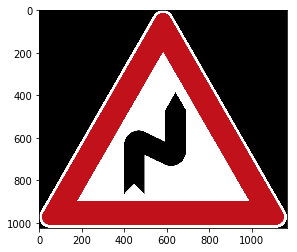

In [138]:
idx = 4
test_result[idx] = evaluate_image(my_test_set['files'][idx], int(my_test_set['labels'][idx]),
                                  list(zip(my_predictions.indices[idx], my_predictions.values[idx])))

Actual sign: Slippery road
Top 5 predicted signs:
------------------------------
| 1.0 | Slippery road |
| 2.2579543e-18 | Dangerous curve to the left |
| 0.0 | Speed limit (20km/h) |
| 0.0 | Speed limit (30km/h) |
| 0.0 | Speed limit (50km/h) |


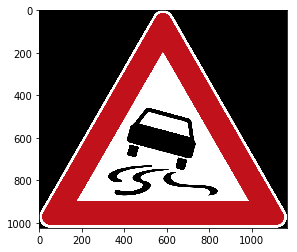

In [139]:
idx = 5
test_result[idx] = evaluate_image(my_test_set['files'][idx], int(my_test_set['labels'][idx]),
                                  list(zip(my_predictions.indices[idx], my_predictions.values[idx])))

Actual sign: Road work
Top 5 predicted signs:
------------------------------
| 1.0 | Road work |
| 1.6606891e-15 | General caution |
| 2.5242018e-25 | Children crossing |
| 2.4939813e-28 | Traffic signals |
| 1.4051093e-29 | Right-of-way at the next intersection |


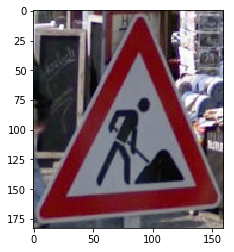

In [140]:
idx = 6
test_result[idx] = evaluate_image(my_test_set['files'][idx], int(my_test_set['labels'][idx]),
                                  list(zip(my_predictions.indices[idx], my_predictions.values[idx])))

Actual sign: Children crossing
Top 5 predicted signs:
------------------------------
| 0.9915577 | Right-of-way at the next intersection |
| 0.006384874 | Pedestrians |
| 0.0020573698 | Children crossing |
| 8.830755e-10 | Road work |
| 1.1653421e-12 | No passing for vehicles over 3.5 metric tons |


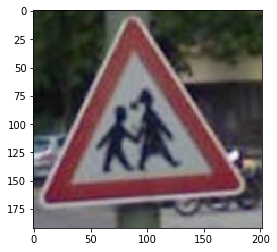

In [141]:
idx = 7
test_result[idx] = evaluate_image(my_test_set['files'][idx], int(my_test_set['labels'][idx]),
                                  list(zip(my_predictions.indices[idx], my_predictions.values[idx])))

Actual sign: Beware of ice/snow
Top 5 predicted signs:
------------------------------
| 0.6557469 | Beware of ice/snow |
| 0.34425312 | Children crossing |
| 4.1773996e-15 | Priority road |
| 5.729585e-19 | No entry |
| 1.0070002e-20 | Right-of-way at the next intersection |


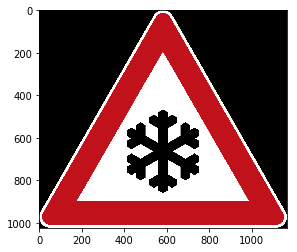

In [142]:
idx = 8
test_result[idx] = evaluate_image(my_test_set['files'][idx], int(my_test_set['labels'][idx]),
                                  list(zip(my_predictions.indices[idx], my_predictions.values[idx])))

Actual sign: Beware of ice/snow
Top 5 predicted signs:
------------------------------
| 1.0 | General caution |
| 1.8569302e-12 | Road work |
| 8.613189e-13 | Traffic signals |
| 5.729566e-15 | Right-of-way at the next intersection |
| 7.6942236e-23 | Double curve |


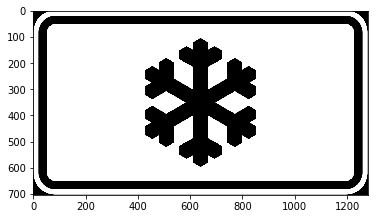

In [143]:
idx = 9
test_result[idx] = evaluate_image(my_test_set['files'][idx], int(my_test_set['labels'][idx]),
                                  list(zip(my_predictions.indices[idx], my_predictions.values[idx])))

Actual sign: Turn right ahead
Top 5 predicted signs:
------------------------------
| 1.0 | Turn right ahead |
| 5.2271904e-14 | No passing for vehicles over 3.5 metric tons |
| 5.0213628e-14 | Speed limit (80km/h) |
| 1.5075945e-14 | End of speed limit (80km/h) |
| 6.534013e-16 | Keep right |


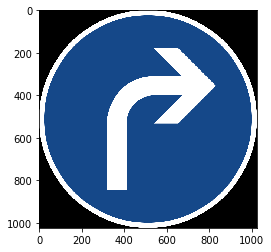

In [144]:
idx = 10
test_result[idx] = evaluate_image(my_test_set['files'][idx], int(my_test_set['labels'][idx]),
                                  list(zip(my_predictions.indices[idx], my_predictions.values[idx])))

Actual sign: Turn left ahead
Top 5 predicted signs:
------------------------------
| 1.0 | Turn left ahead |
| 2.9165532e-18 | Speed limit (30km/h) |
| 7.199597e-24 | Go straight or left |
| 6.7414707e-25 | Speed limit (120km/h) |
| 6.004801e-25 | Ahead only |


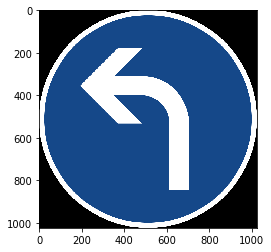

In [145]:
idx = 11
test_result[idx] = evaluate_image(my_test_set['files'][idx], int(my_test_set['labels'][idx]),
                                  list(zip(my_predictions.indices[idx], my_predictions.values[idx])))

Actual sign: Keep right
Top 5 predicted signs:
------------------------------
| 1.0 | Keep right |
| 6.5232904e-20 | Road work |
| 4.0460092e-24 | Bumpy road |
| 3.9658156e-24 | Priority road |
| 3.6998298e-26 | Wild animals crossing |


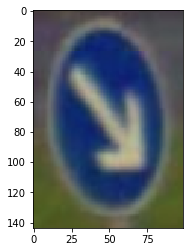

In [146]:
idx = 12
test_result[idx] = evaluate_image(my_test_set['files'][idx], int(my_test_set['labels'][idx]),
                                  list(zip(my_predictions.indices[idx], my_predictions.values[idx])))

Actual sign: Keep right
Top 5 predicted signs:
------------------------------
| 1.0 | Keep right |
| 9.806732e-31 | Road narrows on the right |
| 3.6239985e-31 | Road work |
| 2.6332396e-32 | Ahead only |
| 1.444339e-32 | Priority road |


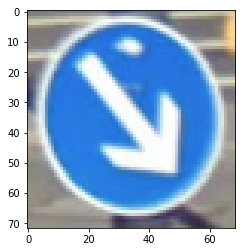

In [147]:
idx = 13
test_result[idx] = evaluate_image(my_test_set['files'][idx], int(my_test_set['labels'][idx]),
                                  list(zip(my_predictions.indices[idx], my_predictions.values[idx])))

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [108]:
### Print out the top five softmax probabilities for the predictions on the German 
### traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
my_predictions

TopKV2(values=array([[1.0000000e+00, 4.9302482e-17, 4.4080806e-17, 6.0084882e-18,
        1.8831832e-18],
       [9.9999487e-01, 1.1653664e-06, 1.0045809e-06, 7.1067103e-07,
        5.8955089e-07],
       [9.9993277e-01, 6.7200199e-05, 5.8023075e-09, 2.9280459e-10,
        4.0121188e-12],
       [9.6060610e-01, 3.9393861e-02, 1.0644796e-14, 9.8209288e-16,
        1.8361316e-19],
       [1.0000000e+00, 4.9661765e-29, 7.0839548e-30, 0.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 2.2579543e-18, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 1.6606891e-15, 2.5242018e-25, 2.4939813e-28,
        1.4051093e-29],
       [9.9155772e-01, 6.3848742e-03, 2.0573698e-03, 8.8307550e-10,
        1.1653421e-12],
       [6.5574688e-01, 3.4425312e-01, 4.1773996e-15, 5.7295849e-19,
        1.0070002e-20],
       [1.0000000e+00, 1.8569302e-12, 8.6131888e-13, 5.7295659e-15,
        7.6942236e-23],
       [1.0000000e+00, 5.2271904e-14, 5.0213628e-14, 1.5075945e-14

***ANSWER*** ( *Model Certainty - Softmax Probabilities* ): As shown above. The top predictions have very high certainty compared to those which ranked lower.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [109]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
        activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
        featuremaps = activation.shape[3]
        plt.figure(plt_num, figsize=(15,15))
        for featuremap in range(featuremaps):
            plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
            plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
            if activation_min != -1 & activation_max != -1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
            elif activation_max != -1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
            elif activation_min !=-1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
            else:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [110]:
def conv1():
    conv_W = tf.trainable_variables()[0]
    conv_b = tf.trainable_variables()[1]
    conv   = tf.nn.conv2d(x, conv_W, strides=[1, 1, 1, 1], padding='VALID') + conv_b
    conv = tf.nn.relu(conv)
    conv = tf.nn.max_pool(conv, ksize=[1, 3, 3, 1], 
                          strides=[1, 1, 1, 1], padding='VALID')
    
    return conv

INFO:tensorflow:Restoring parameters from ./lenet
Actual signame: Priority road
Predicted signame: Priority road


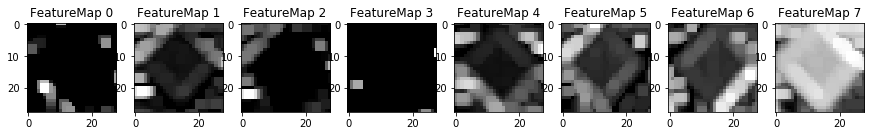

In [113]:
idx = 0
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    print("Actual signame: " + signnames_dict[int(my_test_set['labels'][idx])])
    print("Predicted signame: " + signnames_dict[test_result[idx][1]])
    outputFeatureMap(my_test_data[idx].reshape(1, 32, 32, 1), conv1())

INFO:tensorflow:Restoring parameters from ./lenet
Actual signame: Beware of ice/snow
Predicted signame: Beware of ice/snow


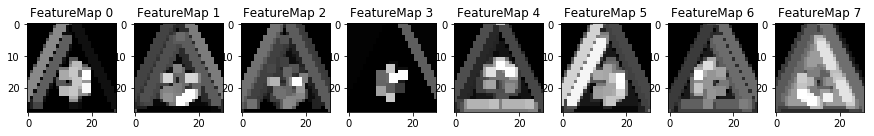

In [114]:
idx = 8
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    print("Actual signame: " + signnames_dict[int(my_test_set['labels'][idx])])
    print("Predicted signame: " + signnames_dict[test_result[idx][1]])
    outputFeatureMap(my_test_data[idx].reshape(1, 32, 32, 1), conv1())

INFO:tensorflow:Restoring parameters from ./lenet
Actual signame: Beware of ice/snow
Predicted signame: General caution


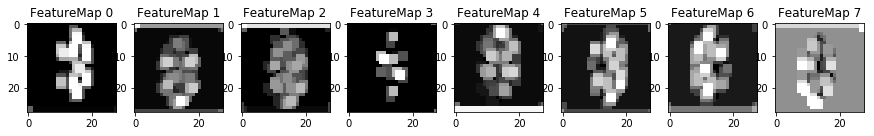

In [115]:
idx = 9
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    print("Actual signame: " + signnames_dict[int(my_test_set['labels'][idx])])
    print("Predicted signame: " + signnames_dict[test_result[idx][1]])
    outputFeatureMap(my_test_data[idx].reshape(1, 32, 32, 1), conv1())